# Problem Set: Thinking About Change

## Get Word Lists for each Sector

In [1]:
def getWordList(file):
    word_list = []
    with open(file) as f:
        word_list = f.read().lower().splitlines()
    print(word_list)
    return word_list

In [2]:
general_list = getWordList('general_list.txt')
tech_list = getWordList('tech_list.txt')
energy_list = getWordList('energy_list.txt')
cd_list = getWordList('cd_list.txt')

['emissions', 'pollution', 'warming', 'environment', 'ecosystem', 'greenhouse', 'sea-level', 'conference of paris', 'weather', 'atmosphere', 'climate']
['solar', 'reusable', 'renewable', 'nuclear', 'carbon', 'neutral', 'greenhouse', 'energy efficient', 'carbon emissions', 'environment', 'electricity']
['oil', 'gas', 'emission-free', 'emissionless', 'fossil', 'fracking', 'climate-related', 'ecosystem', 'low-carbon', 'sustainability', 'petroleum']
['carbon', 'footprint', 'recycle', 'preventative', 'climate fund', 'biosphere', 'landfills', 'environmental', 'clean power', 'reduce', 'deforestation']


In [3]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} datetime

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - datetime

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
import pandas as pd
import datetime as dt
import dask
import glob
import json
import numpy as np
from edgar import Company, TXTML
from edgar import Edgar
import nltk
from nltk.corpus import stopwords
from textblob import Word
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [5]:
def get_edgar(ll, n,file_type):
    filinglist = []
    for el in ll:
        company = Company(el[0], el[1])
        tree = company.get_all_filings(filing_type = file_type)
        docs = Company.get_documents(tree, no_of_documents=n, as_documents=True)
        texts = Company.get_documents(tree, no_of_documents=n, as_documents=False)
        if n<2:
            docs=[docs]
            texts=[texts]
        for i in range(n):
            date = docs[i].content['Filing Date']
            dateStr = str(date)
            year = date[:4]
            text = TXTML.parse_full_10K(texts[i])
            filinglist.append([el[0],el[1],file_type,date,year,text])
    df = pd.DataFrame(filinglist, columns=['Company','CIK','Filing_Type','Filing_Date','Year','TEXT'])
    return df

## Requesting Company Data

In [6]:
tech_companies = [
    ['Alphabet Inc.','0001652044'],
    ['Apple Inc.', '0000320193'],
    ['Microsoft Corp','0000789019'],
    ['IBM Corp', '0000051143'],
    ['INTEL CORP', "50863"]
]

energy_companies = [
    ['EXXON MOBIL CORP','0000034088'],
    ['CHEVRON CORP', '0000093410'],
    ['MARATHON OIL CORP','0000101778'],
    ['Phillips 66', '0001534701'],
    ['Energy Transfer LP', '0001276187']
]

cd_companies = [
    ['MGM Resorts International','0000789570'],
    ['EBAY INC', '0001065088'],
    ['FORD MOTOR CO','0000037996'],
    ['Tesla, Inc.', '0001318605'],
    ['ETSY INC', '0001370637']
]

In [7]:
tech_companiesDF= get_edgar(tech_companies,5,"10-K")
tech_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
5,Apple Inc.,0000320193,10-K,2020-10-30,2020,\n\n\n\n\naapl-20200926truetruetruetruetruetru...
6,Apple Inc.,0000320193,10-K,2019-10-31,2019,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
7,Apple Inc.,0000320193,10-K,2018-11-05,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
8,Apple Inc.,0000320193,10-K,2017-11-03,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
9,Apple Inc.,0000320193,10-K,2016-10-26,2016,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...


In [8]:
energy_companiesDF = get_edgar(energy_companies,5,"10-K")
energy_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,EXXON MOBIL CORP,0000034088,10-K,2020-02-26,2020,\n\n\n\n\n\n\n\n\n\n 0.086252036-04-012021-08-...
1,EXXON MOBIL CORP,0000034088,10-K,2019-02-27,2019,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
2,EXXON MOBIL CORP,0000034088,10-K,2018-02-28,2018,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
3,EXXON MOBIL CORP,0000034088,10-K,2017-02-22,2017,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
4,EXXON MOBIL CORP,0000034088,10-K,2016-02-24,2016,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...
5,CHEVRON CORP,0000093410,10-K,2020-02-21,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
6,CHEVRON CORP,0000093410,10-K,2019-02-22,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
7,CHEVRON CORP,0000093410,10-K,2018-02-22,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
8,CHEVRON CORP,0000093410,10-K,2017-02-23,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n U...
9,CHEVRON CORP,0000093410,10-K,2016-02-25,2016,\n\n\n\t\n\t\t\n\t\t\n\t\t10-K\n\t\n\t\n UNITE...


In [9]:
cd_companiesDF = get_edgar(cd_companies,5,"10-K")
cd_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,MGM Resorts International,0000789570,10-K,2020-02-27,2020,\n\n\n\n\n\n\n\n\n\n\n\nmgm-10k_20191231.htm\n...
1,MGM Resorts International,0000789570,10-K,2019-02-27,2019,\n\n\n\n\nmgm-10k_20181231.htm\n\n\n\n\n\n \n ...
2,MGM Resorts International,0000789570,10-K,2018-03-01,2018,\n\n\n\n\nmgm-10k_20171231.htm\n\n\n\n\n\n \n ...
3,MGM Resorts International,0000789570,10-K,2017-03-01,2017,\n\n\n\n\nmgm-10k_20161231.htm\n\n\n\n\n\n \n ...
4,MGM Resorts International,0000789570,10-K,2016-02-29,2016,\n\n\n\n\nmgm-10k_20151231.htm\n\n\n\n\n\n \n ...
5,EBAY INC,0001065088,10-K,2020-04-29,2020,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
6,EBAY INC,0001065088,10-K,2020-01-31,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
7,EBAY INC,0001065088,10-K,2019-01-30,2019,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
8,EBAY INC,0001065088,10-K,2018-02-05,2018,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
9,EBAY INC,0001065088,10-K,2017-02-06,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\n ...


#### Combine all dataframes

In [10]:
all_DF = pd.concat([tech_companiesDF, energy_companiesDF,cd_companiesDF], axis=0)
all_DF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,\n\nAmendment No. 1 to Form 10-K\n\n \n\n \...
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
...,...,...,...,...,...,...
20,ETSY INC,0001370637,10-K,2020-02-27,2020,\n\n\n\n\n\n\n\n\t\n\t\t\n\t\tDocument\n\t\n\t...
21,ETSY INC,0001370637,10-K,2019-02-28,2019,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
22,ETSY INC,0001370637,10-K,2018-03-01,2018,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...
23,ETSY INC,0001370637,10-K,2017-02-28,2017,\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUN...


## Cleaning Text

### Clean text function

In [11]:
#stopwords
stop = set(stopwords.words('english'))

def clean_text(DF): 
    #lowercase
    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

    #remove punctuation
    DF['TEXT'] = DF['TEXT'].str.replace('[^\w\s]','').replace('/_/g', "")

    #remove stopwords
    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    #remove numbers
    DF['TEXT'] = DF['TEXT'].str.replace('\d+', '')

    #remove non-english words
    nltk.download('words')
    words = set(nltk.corpus.words.words())

    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x for x in str(x).split() if x.lower() in words or not x.isalpha()))
    
    return DF

### Clean dataframes

In [40]:
tech_companiesDF['Sector'] = 'Technology'
energy_companiesDF['Sector']='Energy'
cd_companiesDF['Sector'] = 'Consumer Discretionary'

In [12]:
tech_companiesDF = clean_text(tech_companiesDF)
energy_companiesDF = clean_text(energy_companiesDF)
cd_companiesDF = clean_text(cd_companiesDF)
all_DF = clean_text(all_DF)

[nltk_data] Downloading package words to /users/asumpon/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package words to /users/asumpon/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package words to /users/asumpon/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package words to /users/asumpon/nltk_data...
[nltk_data]   Package words is already up-to-date!


#### Remove frequent words function

In [13]:
#remove frequent words
def remove_freq(DF):
    freq = pd.Series(' '.join(DF['TEXT']).split()).value_counts()[:10]
    freq

    freq = list(freq.index)
    DF['TEXT'] = DF['TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    DF['TEXT'].head()
    return DF

#### Remove frequent words from dataframe

In [14]:
remove_freq(tech_companiesDF)
remove_freq(energy_companiesDF)
remove_freq(cd_companiesDF)
remove_freq(all_DF)

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT
0,Alphabet Inc.,0001652044,10-K,2020-02-04,2020,document united exchange _____________________...
1,Alphabet Inc.,0001652044,10-K,2019-02-06,2019,amendment form k united exchange commission fo...
2,Alphabet Inc.,0001652044,10-K,2019-02-05,2019,document united exchange _____________________...
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,document united exchange _____________________...
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,document united exchange _____________________...
...,...,...,...,...,...,...
20,ETSY INC,0001370637,10-K,2020-02-27,2020,document united exchange _____________________...
21,ETSY INC,0001370637,10-K,2019-02-28,2019,document united exchange _____________________...
22,ETSY INC,0001370637,10-K,2018-03-01,2018,document united exchange _____________________...
23,ETSY INC,0001370637,10-K,2017-02-28,2017,document united exchange _____________________...


### Cleaned Data Frames

In [41]:
tech_companies = tech_companiesDF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)
energy_companies = energy_companiesDF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)
cd_companies = cd_companiesDF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)
all_DF = all_DF[['Company', 'CIK', 'Filing_Date', 'Year','Sector','TEXT']].sort_values(by='Filing_Date', ascending=True)

KeyError: "['Sector'] not in index"

In [16]:
all_DF

,Company,CIK,Filing_Date,Year,TEXT
24,INTEL CORP,50863,2016-02-12,2016,k united exchange form report pursuant section...
19,Phillips 66,0001534701,2016-02-19,2016,k table united exchange commission form k mark...
19,IBM Corp,0000051143,2016-02-23,2016,click rapidly navigate document united exchang...
4,EXXON MOBIL CORP,0000034088,2016-02-24,2016,united exchange commission form k annual repor...
9,CHEVRON CORP,0000093410,2016-02-25,2016,k united exchange commission form k annual rep...
...,...,...,...,...,...
20,ETSY INC,0001370637,2020-02-27,2020,document united exchange _____________________...
15,"Tesla, Inc.",0001318605,2020-04-28,2020,tslaka_htm false large accelerated filer unite...
5,EBAY INC,0001065088,2020-04-29,2020,true large accelerated filer table contents un...
10,Microsoft Corp,0000789019,2020-07-30,2020,msftk_htm false united exchange commission for...


## Frequency of Special Words

In [17]:
def special_freq(DF, sector_list):
    freqList = []
    for text in DF['TEXT']:
        wordlist = text.split()
        clean_words = []
        for word in wordlist:
            if word in general_list:
                clean_words.append(Word(re.sub("[^a-zA-Z]+", "", word)).lemmatize())
            if word in sector_list:
                clean_words.append(Word(re.sub("[^a-zA-Z]+", "", word)).lemmatize())
        count = Counter(clean_words)
        total = 0
        for w, frequency in count.items():
            total = total + frequency
        freqList.append(total)
    return freqList

In [18]:
tech_companiesDF['Frequency'] = special_freq(tech_companiesDF, tech_list)
energy_companiesDF['Frequency'] = special_freq(energy_companiesDF, energy_list)
cd_companiesDF['Frequency'] = special_freq(cd_companiesDF, cd_list)
all_DF['Frequency'] = special_freq(all_DF,[])

In [38]:
tech_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Frequency,Sector
24,INTEL CORP,50863,10-K,2016-02-12,2016,k united exchange form report pursuant section...,44,Technology
19,IBM Corp,0000051143,10-K,2016-02-23,2016,click rapidly navigate document united exchang...,29,Technology
14,Microsoft Corp,0000789019,10-K,2016-07-28,2016,k table contents united exchange commission fo...,30,Technology
9,Apple Inc.,0000320193,10-K,2016-10-26,2016,document united exchange form k mark one annua...,5,Technology
18,IBM Corp,0000051143,10-K,2017-02-28,2017,click rapidly navigate document united exchang...,24,Technology
4,Alphabet Inc.,0001652044,10-K,2017-02-03,2017,document united exchange _____________________...,9,Technology
13,Microsoft Corp,0000789019,10-K,2017-08-02,2017,msftk_htm united exchange commission form k an...,31,Technology
8,Apple Inc.,0000320193,10-K,2017-11-03,2017,document united exchange form k mark one annua...,5,Technology
23,INTEL CORP,50863,10-K,2017-02-17,2017,document united exchange form report pursuant ...,25,Technology
3,Alphabet Inc.,0001652044,10-K,2018-02-06,2018,document united exchange _____________________...,10,Technology


In [20]:
energy_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Frequency
0,EXXON MOBIL CORP,0000034088,10-K,2020-02-26,2020,united exchange commission form k annual repor...,88
1,EXXON MOBIL CORP,0000034088,10-K,2019-02-27,2019,united exchange commission form k annual repor...,89
2,EXXON MOBIL CORP,0000034088,10-K,2018-02-28,2018,united exchange commission form k annual repor...,86
3,EXXON MOBIL CORP,0000034088,10-K,2017-02-22,2017,united exchange commission form k annual repor...,82
4,EXXON MOBIL CORP,0000034088,10-K,2016-02-24,2016,united exchange commission form k annual repor...,84
5,CHEVRON CORP,0000093410,10-K,2020-02-21,2020,document note beginning page finance lease end...,91
6,CHEVRON CORP,0000093410,10-K,2019-02-22,2019,document united exchange commission form k ann...,85
7,CHEVRON CORP,0000093410,10-K,2018-02-22,2018,document united exchange commission form k ann...,77
8,CHEVRON CORP,0000093410,10-K,2017-02-23,2017,document united exchange commission form k ann...,78
9,CHEVRON CORP,0000093410,10-K,2016-02-25,2016,k united exchange commission form k annual rep...,73


In [21]:
cd_companiesDF

,Company,CIK,Filing_Type,Filing_Date,Year,TEXT,Frequency
0,MGM Resorts International,0000789570,10-K,2020-02-27,2020,mgmk_htm false large accelerated filer de leas...,48
1,MGM Resorts International,0000789570,10-K,2019-02-27,2019,mgmk_htm united exchange commission form k mar...,47
2,MGM Resorts International,0000789570,10-K,2018-03-01,2018,mgmk_htm united exchange commission form k mar...,51
3,MGM Resorts International,0000789570,10-K,2017-03-01,2017,mgmk_htm united exchange commission form k mar...,45
4,MGM Resorts International,0000789570,10-K,2016-02-29,2016,mgmk_htm united exchange commission form k mar...,63
5,EBAY INC,0001065088,10-K,2020-04-29,2020,true large accelerated filer table contents un...,6
6,EBAY INC,0001065088,10-K,2020-01-31,2020,document united exchange commission form k ann...,38
7,EBAY INC,0001065088,10-K,2019-01-30,2019,document accelerated united exchange commissio...,41
8,EBAY INC,0001065088,10-K,2018-02-05,2018,document accelerated united exchange commissio...,38
9,EBAY INC,0001065088,10-K,2017-02-06,2017,document united exchange commission form k rep...,33


In [32]:
all_DF

,Company,CIK,Filing_Date,Year,TEXT,Frequency
24,INTEL CORP,50863,2016-02-12,2016,k united exchange form report pursuant section...,26
9,Apple Inc.,0000320193,2016-10-26,2016,document united exchange form k mark one annua...,3
14,Microsoft Corp,0000789019,2016-07-28,2016,k table contents united exchange commission fo...,22
24,Energy Transfer LP,0001276187,2016-02-29,2016,k table exchange form report pursuant section ...,97
4,MGM Resorts International,0000789570,2016-02-29,2016,mgmk_htm united exchange commission form k mar...,18
...,...,...,...,...,...,...
6,EBAY INC,0001065088,2020-01-31,2020,document united exchange commission form k ann...,5
20,INTEL CORP,50863,2020-01-24,2020,document intctrading_day united exchange form ...,42
10,Microsoft Corp,0000789019,2020-07-30,2020,msftk_htm false united exchange commission for...,29
15,Phillips 66,0001534701,2020-02-21,2020,document return equity psxreporting_unit psxjo...,38


## Visualizations

### Plot Frequency for Entire Sector

In [33]:
plt.style.use('ggplot')
def visualizeFreqPerSector(DF, title, xMax):
    plt.plot(DF.groupby('Year')['Frequency'].sum())
    plt.xlim([2015,2021])
    plt.ylim([0,xMax])
    plt.title('Frequency of Special Words and Sector-specific words for '+ title + ' 2016-2020')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

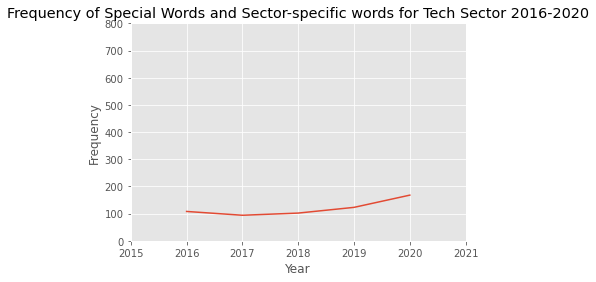

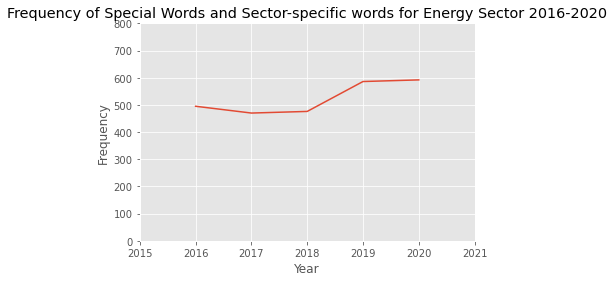

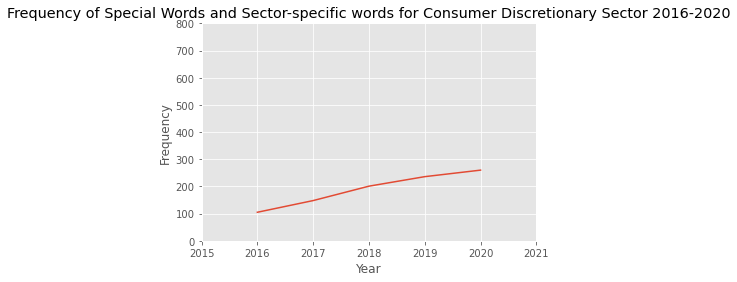

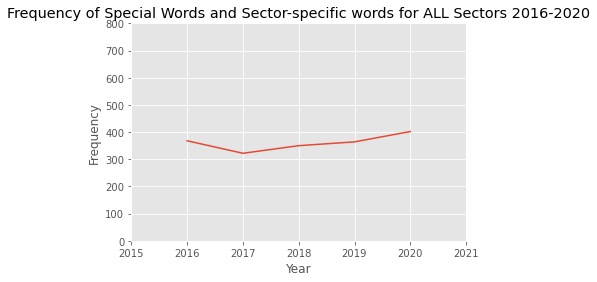

In [34]:
visualizeFreqPerSector(tech_companiesDF,'Tech Sector',800)
visualizeFreqPerSector(energy_companiesDF,'Energy Sector',800)
visualizeFreqPerSector(cd_companiesDF,'Consumer Discretionary Sector',800)
visualizeFreqPerSector(all_DF,'ALL Sectors',800)

In [35]:
plt.style.use('ggplot')
def visualizeFreqPerCompany(DF, title,xMax):
    DF['Year'] = DF['Year'].astype(int)
    DF.sort_values(by='Year', inplace=True, ascending=True)
    df = pd.DataFrame(dict(x= DF['Year'], y = DF['Frequency'], label = DF['Company']))
    groups = df.groupby('label')

    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.set_xlim([2015,2021])
    ax.set_ylim([0,xMax])
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=9, label=name)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 9})
    plt.title('Frequency of Special Words and Sector-specific words per '+ title)
    plt.xlabel('Year')
    plt.ylabel('Frequency')

    plt.show()

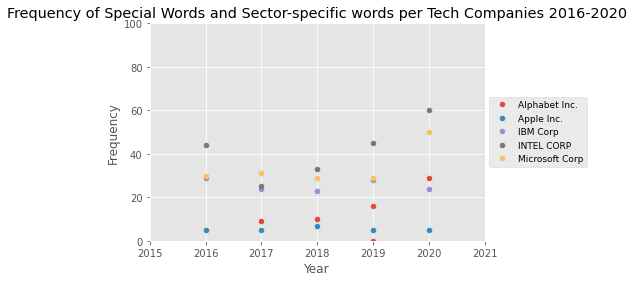

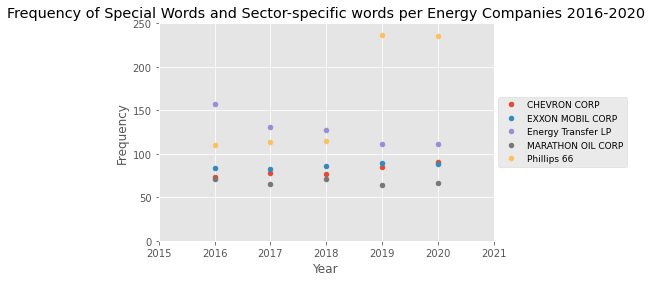

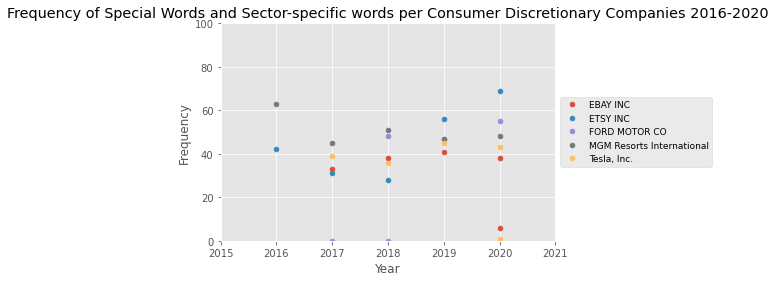

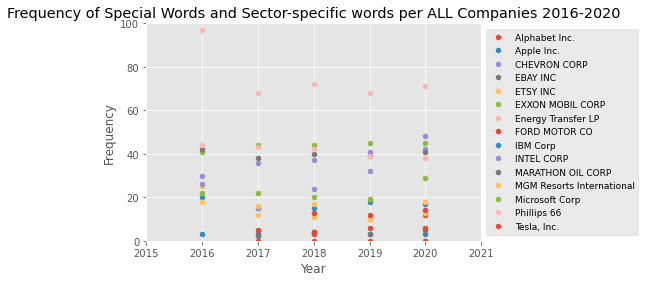

In [36]:
visualizeFreqPerCompany(tech_companiesDF,'Tech Companies 2016-2020',100)
visualizeFreqPerCompany(energy_companiesDF,'Energy Companies 2016-2020',250)
visualizeFreqPerCompany(cd_companiesDF,'Consumer Discretionary Companies 2016-2020',100)
visualizeFreqPerCompany(all_DF,'ALL Companies 2016-2020',100)